# Anaconda
# Jupyter Notebook
## Cell
## Command mode
- 셀 자체에 명령(셀 추가, 삭제, 이동, 복사, ...)
- a(bove) : 현재 셀 위에 셀 추가
- b(elow) : 현재 셀 아래에 셀 추가
- x       : 현재 셀 자르기, 삭제 대용으로 사용

## Edit mode
- 셀 안에다가 무언가를 입력(코드, 문서, ...)
- 실행하면 셀 단위로 실행(shift + enter)
- 셀 맨 마지막 결과만 자동으로 출력

# 데이터(=2차원 테이블) 분석
- 데이터는 테이블이다!
- Pandas => 새로운 자료구조(Series, DataFrame)를 제공

## Series
- 1차원 자료구조
- 구성요소 2개 : index, values
- 순서있음 => 슬라이싱, for문 ...

In [1]:
import pandas as pd

In [2]:
# A, B, C, D, E
math = [89, 92, 91, 90, 91]
math_sr = pd.Series( math, index=['A', 'B', 'C', 'D', 'E'] )
eng = [92, 89, 90, 90, 91]
eng_sr = pd.Series( eng, index=['A', 'B', 'C', 'D', 'E'] )

In [6]:
# 데이터 접근하기
# 인덱스
# 순서
math_sr['A']
math_sr.iloc[0]

89

In [18]:
# 슬라이싱
math_sr[:2]

A    89
B    92
dtype: int64

In [20]:
# 시리즈의 기능들
math_sr.sort_values(ascending=False)

B    92
C    91
E    91
D    90
A    89
dtype: int64

In [21]:
# 필터링 : 조건을 이용해서 데이터를 가져올 수 있음
math_sr[ math_sr > 90 ]

B    92
C    91
E    91
dtype: int64

In [31]:
# 시리즈의 연산
# 인덱스를 기준으로 데이터끼리 연산이 됨

math_sr - eng_sr

A   -3
B    3
C    1
D    0
E    0
dtype: int64

In [30]:
# 시리즈의 연산2
# 시리즈의 모든 데이터에게 똑같은 값을 연산해 줌

(math_sr + eng_sr) / 2

A    90.5
B    90.5
C    90.5
D    90.0
E    91.0
dtype: float64

## DataFrame
- 2차원 자료구조
- 구성요소 3개 : column, index, values
- 순서는 기본적으로 행방향

In [35]:
# A, B, C, D, E
math = [89, 92, 91, 90, 91]
eng = [92, 89, 90, 90, 91]
kor = [90, 91, 89, 92, 90]
temp = {'math':math, 'eng':eng, 'kor':kor}
grade_df = pd.DataFrame(temp, index=['A', 'B', 'C', 'D', 'E'])

In [38]:
# 데이터 접근하기
# 컬럼이 기본

grade_df[ 'math' ]

A    89
B    92
C    91
D    90
E    91
Name: math, dtype: int64

In [40]:
# 컬럼을 동시에 여러개 선택 => []
rade_df[ ['math', 'eng'] ]

,math,eng
A,89,92
B,92,89
C,91,90
D,90,90
E,91,91


In [41]:
# 행으로?! => .loc[인덱스]

grade_df.loc['A']

math    89
eng     92
kor     90
Name: A, dtype: int64

In [46]:
# 포인트로 접근하기
# .loc[인덱스, 컬럼]

grade_df.loc['A', 'math']

89

In [48]:
# iloc => 테이블에 숫자 좌표로 접근이 가능
# iloc[행순서, 열순서]

grade_df.iloc[0, 0]

89

In [50]:
# 슬라이싱 => 기본적으로 행방향으로 짤라옴
grade_df[:2]

,math,eng,kor
A,89,92,90
B,92,89,91


In [52]:
# 행, 열 양방향 슬라이싱
# iloc[ 행 슬라이싱 , 열 슬라이싱]

grade_df.iloc[ :2 , :2]

,math,eng
A,89,92
B,92,89


In [57]:
# 기능들
grade_df.sort_values( ['math', 'eng'], ascending=False )

,math,eng,kor
B,92,89,91
E,91,91,90
C,91,90,89
D,90,90,92
A,89,92,90


In [59]:
# 필터링
# 어떤 속성을 기준으로 조건을 주는 것인지 명확히!
grade_df[ grade_df['math'] > 90 ]

,math,eng,kor
B,92,89,91
C,91,90,89
E,91,91,90


In [62]:
# 조건이 2개일 때
# 논리연산 : and(&), or(|), not(~)
# ()를 이용해서 순서를 정확히 입력!
grade_df[ (grade_df['math'] > 90) | (grade_df['eng'] > 90) ]

,math,eng,kor
A,89,92,90
B,92,89,91
C,91,90,89
E,91,91,90


In [64]:
# 조건이 3개 이상일 때
# 먼저 조건을 계산해서 변수에 할당해서 사용
cond1 = grade_df['math'] > 90
cond2 = grade_df['eng'] > 90
cond3 = grade_df['kor'] > 90

grade_df[ cond1 & cond2 & cond3 ]

,math,eng,kor


In [69]:
# 시리즈의 연산
# 기존의 속성을 가지고 연산해서 새로운 속성(컬럼)을 만든다!

grade_df['total'] = grade_df['math'] + grade_df['eng'] + grade_df['kor']

In [70]:
grade_df['avg'] = (grade_df['total']/3).round(2)

## DF의 주요기능 5가지
- 시리즈의 연산, 필터링, apply, groupby, pivot

In [72]:
import pandas as pd # 데이터 분석에 적합한 새로운 자료구조 2개를 제공
import numpy as np  # 행렬 연산 등의 수학적 기능들
import matplotlib.pyplot as plt # 데이터 시각화 기본 모듈
import seaborn as sns

In [75]:
titanic_df = sns.load_dataset( 'titanic' )

In [78]:
# 시리즈의 연산
# 새로운 속성 도출!

titanic_df['family'] = titanic_df['sibsp'] + titanic_df['parch']

In [ ]:
# 필터링
# 남자
# 나이 20살 이상
# 나이 25살 미만
# 3 class
# 죽었음
cond1 = titanic_df['sex'] == 'male'
cond2 = titanic_df['age'] >= 20
cond3 = titanic_df['age'] < 25
cond4 = titanic_df['pclass'] == 3
cond5 = titanic_df['survived'] ==0
 
titanic_df[cond1 & cond2 & cond3 & cond4 & cond5]

In [ ]:
# apply => 한 열의 모든 데이터에게 똑같은 코드를 적용해 줌

# age 20살 미만 => young
# age 40살 미만 => middle
# age 40살 이상 => old

def temp(x):
    if x < 20 :
        return 'young'
    elif x < 40:
        return 'middle'
    else:
        return 'old'

titanic_df['age_c'] = titanic_df['age'].apply(temp)

In [104]:
# groupby
# 집계 => 여러개의 데이터를 하나의 값으로 축약
# mean, max, min, count, sum ...
# groupby => 카테고리 별로 모아서 집계
# 결과가 1차원
titanic_df.groupby( ['pclass', 'sex'] )['age'].mean()



pclass  sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: age, dtype: float64

In [107]:
# pivot => 카테고리 별 집계
# display => 2차원

pd.pivot_table( titanic_df, columns='sex', index='pclass', values='age',
                aggfunc='count' )

sex,female,male
pclass,,
1,85,101
2,74,99
3,102,253


# 시각화
## 시각화 기본 폼

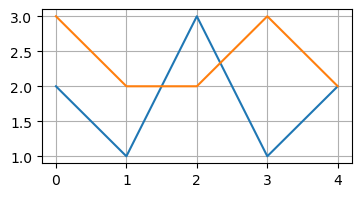

In [115]:
plt.figure(figsize=(4, 2))    # 시작폼

plt.plot( [2, 1, 3, 1, 2] )
plt.plot( [3, 2, 2, 3, 2] )

plt.show()      # 마침표

## 시각화 이유?!
- 시각화는 우리가 데이터를 이해하기 위해서!
- 데이터 종류에 따라 어떤 시각화를 해야하나
- 데이터 종류
    - 카테고리
    - 연속된 숫자
 
### 카테고리 데이터 시각화
- 카테고리 별 데이터의 개수(분포)
- sns.countplot

In [128]:
tips_df = sns.load_dataset( 'tips' )

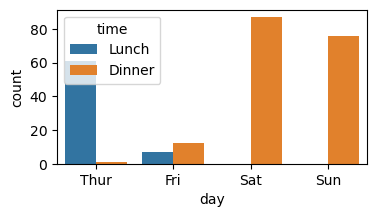

In [137]:
plt.figure(figsize=(4, 2))

sns.countplot( data=tips_df, x='day', hue='time'  )

plt.show()

### 연속된 숫자 데이터 시각화
- 데이터가 어디에 몰려있고, 어떻게 퍼져 있는지(분포)
- sns.histplot

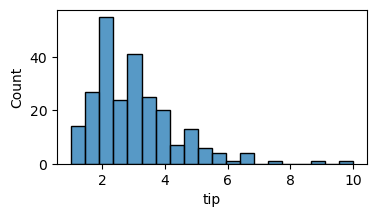

In [146]:
plt.figure(figsize=(4, 2))

sns.histplot( data=tips_df, x='tip', bins=20 )

plt.show()

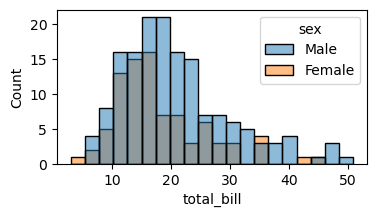

In [148]:
plt.figure(figsize=(4, 2))

sns.histplot( data=tips_df, x='total_bill', bins=20 )

plt.show()

### 연속된 숫자 데이터 vs 카테고리 데이터 간의 관계
- 카테고리 별로 연속된 숫자 데이터의 분포
- sns.boxplot, sns.violinplot

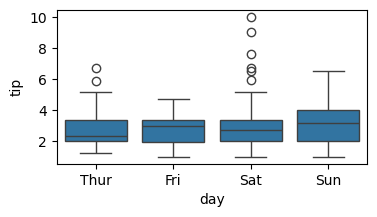

In [151]:
plt.figure(figsize=(4, 2))
sns.boxplot( data=tips_df, x='day', y='tip' )
plt.show()

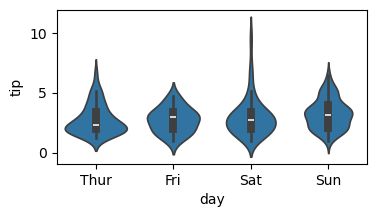

In [152]:
plt.figure(figsize=(4, 2))
sns.violinplot( data=tips_df, x='day', y='tip' )
plt.show()

### 연속된 숫자 데이터 vs 연속된 숫자 데이터 간의 관계
- 2차원 평면 위에 두 데이터가 만나는 지점마다 점을 찍음 => 두 데이터가 어떻게 퍼져있는가
- 산포도

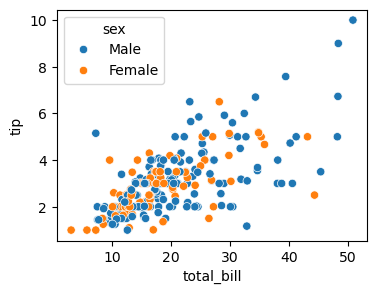

In [155]:
plt.figure(figsize=(4, 3))
sns.scatterplot( data=tips_df, x='total_bill', y='tip', hue='sex' )
plt.show()

# ML 맛보기

In [159]:
iris_df = sns.load_dataset('iris')

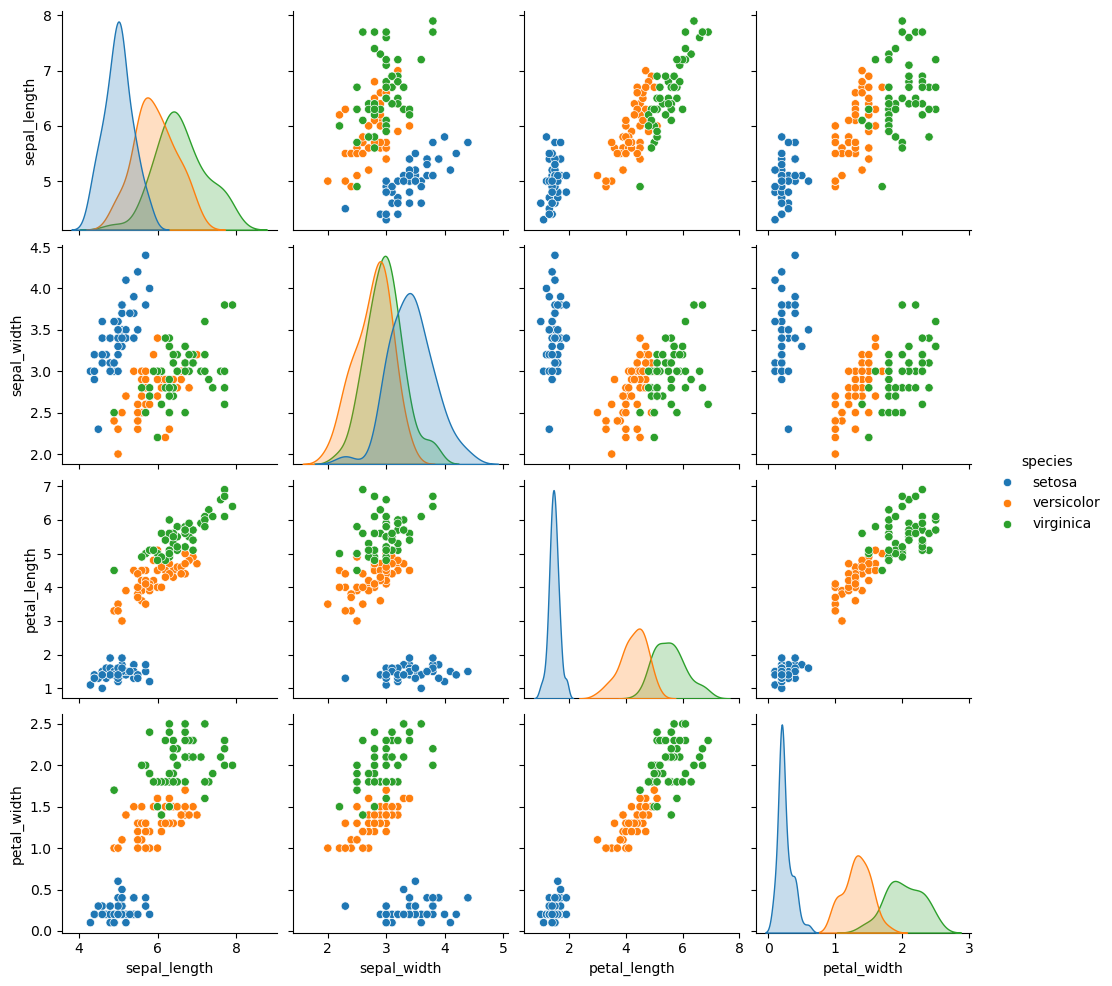

In [162]:
sns.pairplot( iris_df, hue='species')
plt.show()

In [ ]:
새로운 데이터가 오면 주변에 데이터를 보고 애를 판단

새로운 데이터
=> 주변 데이터 : 거리 측정
=> 거리 작은 순으로 정렬
=> K개의 데이터를 가지고 와서
=> 여기서 최빈도값
=> 우리가 직접 하지 않고 잘 짜여있고, 호환성 좋은 사이킷런 사용!

In [176]:
from sklearn.neighbors import KNeighborsClassifier

# 1. 모델 생성
knn = KNeighborsClassifier()
# 2. 모델 훈련(fit)
# target : 무조건 1차원 
# feature : 무조건 2차원
y = iris_df['species']
X = iris_df.iloc[:, :-1]
knn.fit(X, y)
# 3. 훈련된 모델 검증(score), 예측(predict)
knn.score( X, y )

0.9666666666666667

In [186]:
# 훈련용 데이터, 검증용 데이터 나누기
from sklearn.model_selection import train_test_split

train_x, valid_x, train_y, valid_y = train_test_split(X, 
                                                      y, 
                                                      test_size=0.2,
                                                      random_state=13,
                                                      stratify=y )

In [188]:
# 1. 모델 생성
knn = KNeighborsClassifier()
# 2. 모델 훈련
knn.fit(train_x, train_y)
# 3. 검증, 예측
knn.score(valid_x, valid_y)

0.9666666666666667

In [192]:
# K를 어떻게 세팅할까?!
# 주변에 몇개의 데이터를 볼것인가
# 일반적으로 교차검증을 이용하여 K를 세팅
from sklearn.model_selection import cross_val_score

score_list = []
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score( knn , train_x, train_y, cv=4  ).mean()
    score_list.append(score)

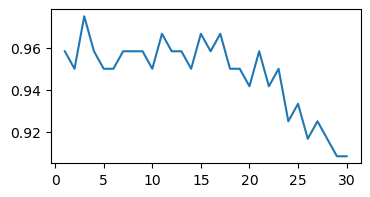

In [194]:
plt.figure(figsize=(4, 2))
plt.plot( range(1, 31), score_list )
plt.show()

In [198]:
# 0. 교차검증을 통해서 하이퍼 파라미터를 찾음
# 1. 모델 생성
knn = KNeighborsClassifier(6)
# 2. 훈련
knn.fit(train_x, train_y)
# 3. 검증
knn.score(valid_x, valid_y)

0.9666666666666667

In [ ]:
# 왜 이렇게 잘 되지?!
# => 데이터가 너무 완벽하다
# 1. 패턴이 명확
# 2. 가공이 다 되어 있음
    # 다 숫자로 되어있음(인코딩)
    # 범위를 다 맞춰줌(스케일링)

In [202]:
iris_df['sepal_length']  = iris_df['sepal_length'] * 100

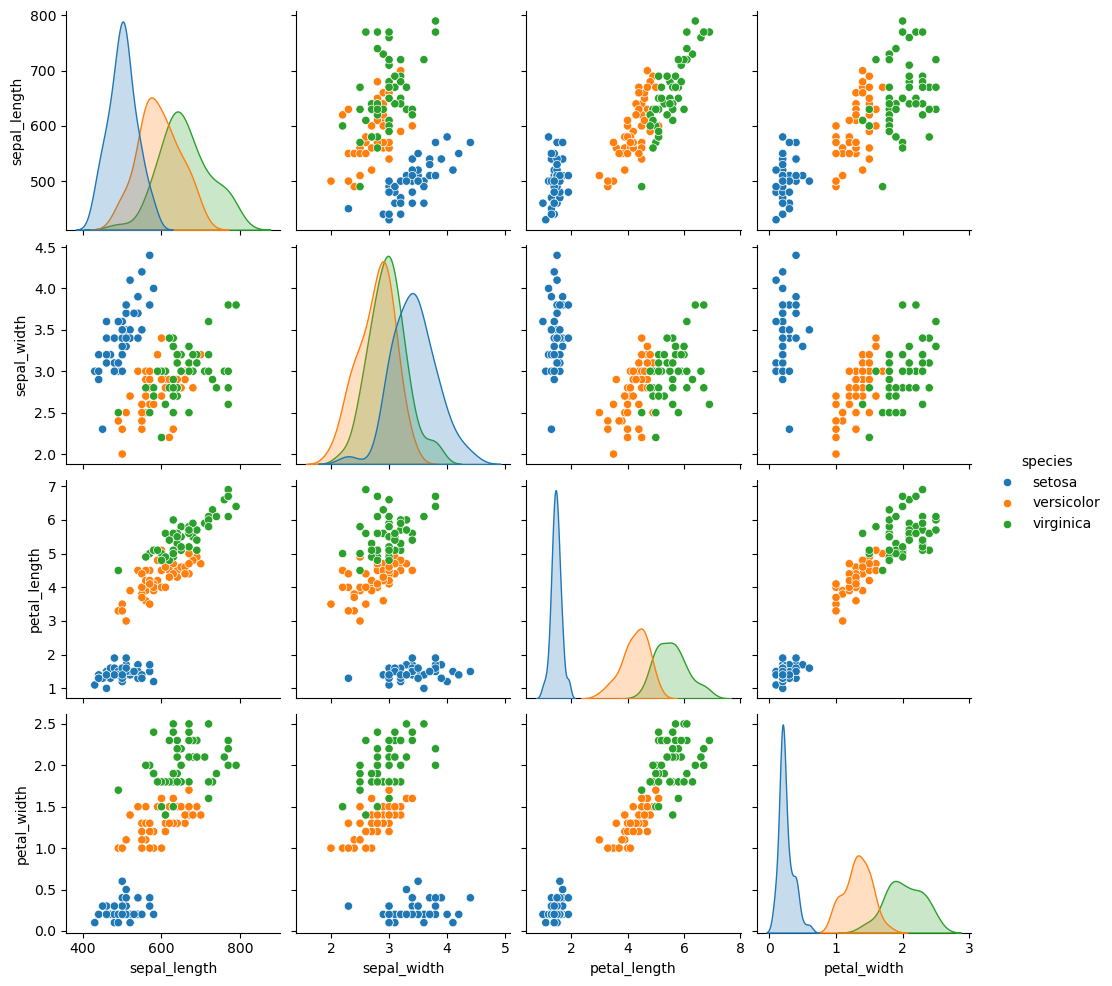

In [203]:
sns.pairplot( iris_df, hue='species' )
plt.show()

In [204]:
y = iris_df['species']
X = iris_df.iloc[:, :-1]
train_x, valid_x, train_y, valid_y = train_test_split(X, 
                                                      y, 
                                                      test_size=0.2,
                                                      random_state=13,
                                                      stratify=y )

knn = KNeighborsClassifier( 6 )
knn.fit(train_x, train_y)
knn.score(valid_x, valid_y)

0.8

In [ ]:
# feature engineering (특성 가공)
# 인코딩
# 스케일링
# ...

In [ ]:
# 데이터를 가공
    # 사람이 이해하기 좋은 데이터 => 컴퓨터가 이해하기 좋은 데이터로 바꿔 줌
    # 스케일링
    # 인코딩 등
# 모델 별로
    # 교차검증을 통해서 하이퍼 파라미터를 찾아줌
    # 모델 생성 => 훈련 => 검증